In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Data filtering
df = pd.read_csv('greenbuildings.csv')
df = df[df['leasing_rate'] > 10]
df.head(10)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
5,94765,1,231633,2.22,43.16,92.74,14,20,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.010100,0.028900,17.50
7,234578,6,225895,4.01,14.77,91.02,15,24,0,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
8,42087,6,912011,4.01,17.00,99.32,31,34,0,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
9,233989,6,518578,4.01,17.00,93.54,21,36,1,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50


In [13]:
#Calculating median rents for buildings
median_green = df[df['green_rating'] == 1]['Rent'].median()
median_non_green = df[df['green_rating'] == 0]['Rent'].median()
print(median_green)
print(median_non_green)

27.6
25.03


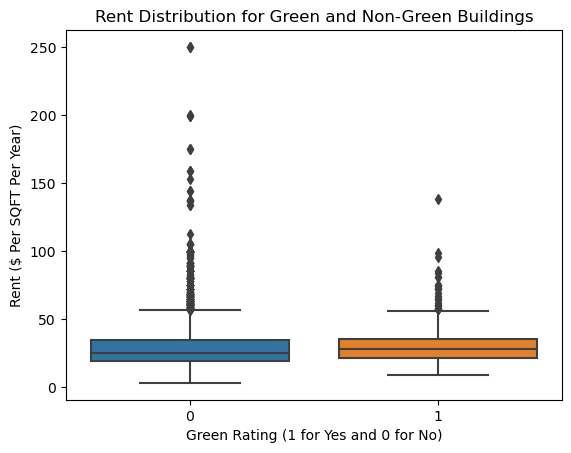

In [14]:
#Exploring the rent distribution
sns.boxplot(x='green_rating', y='Rent', data=df)
plt.title('Rent Distribution for Green and Non-Green Buildings')
plt.xlabel('Green Rating (1 for Yes and 0 for No)')
plt.ylabel('Rent ($ Per SQFT Per Year)')
plt.show()

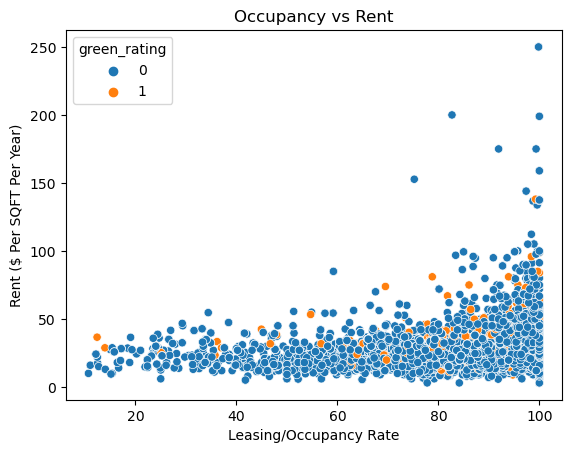

In [15]:
#Explore occupancy vs rent
sns.scatterplot(x='leasing_rate', y='Rent', hue='green_rating', data=df)
plt.title('Occupancy vs Rent')
plt.xlabel('Leasing/Occupancy Rate')
plt.ylabel('Rent ($ Per SQFT Per Year)')
plt.show()

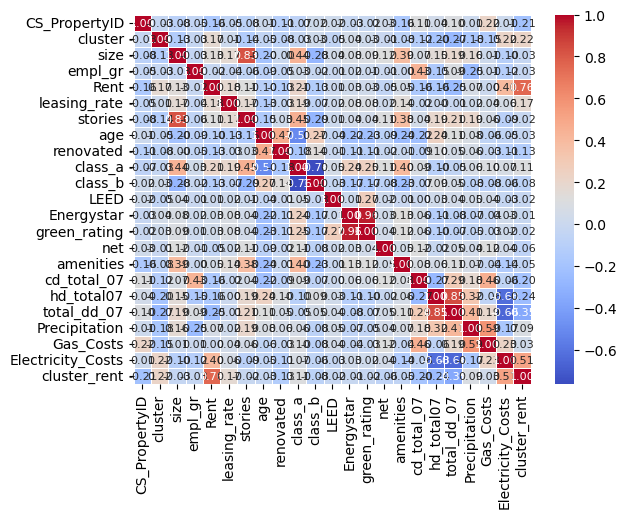

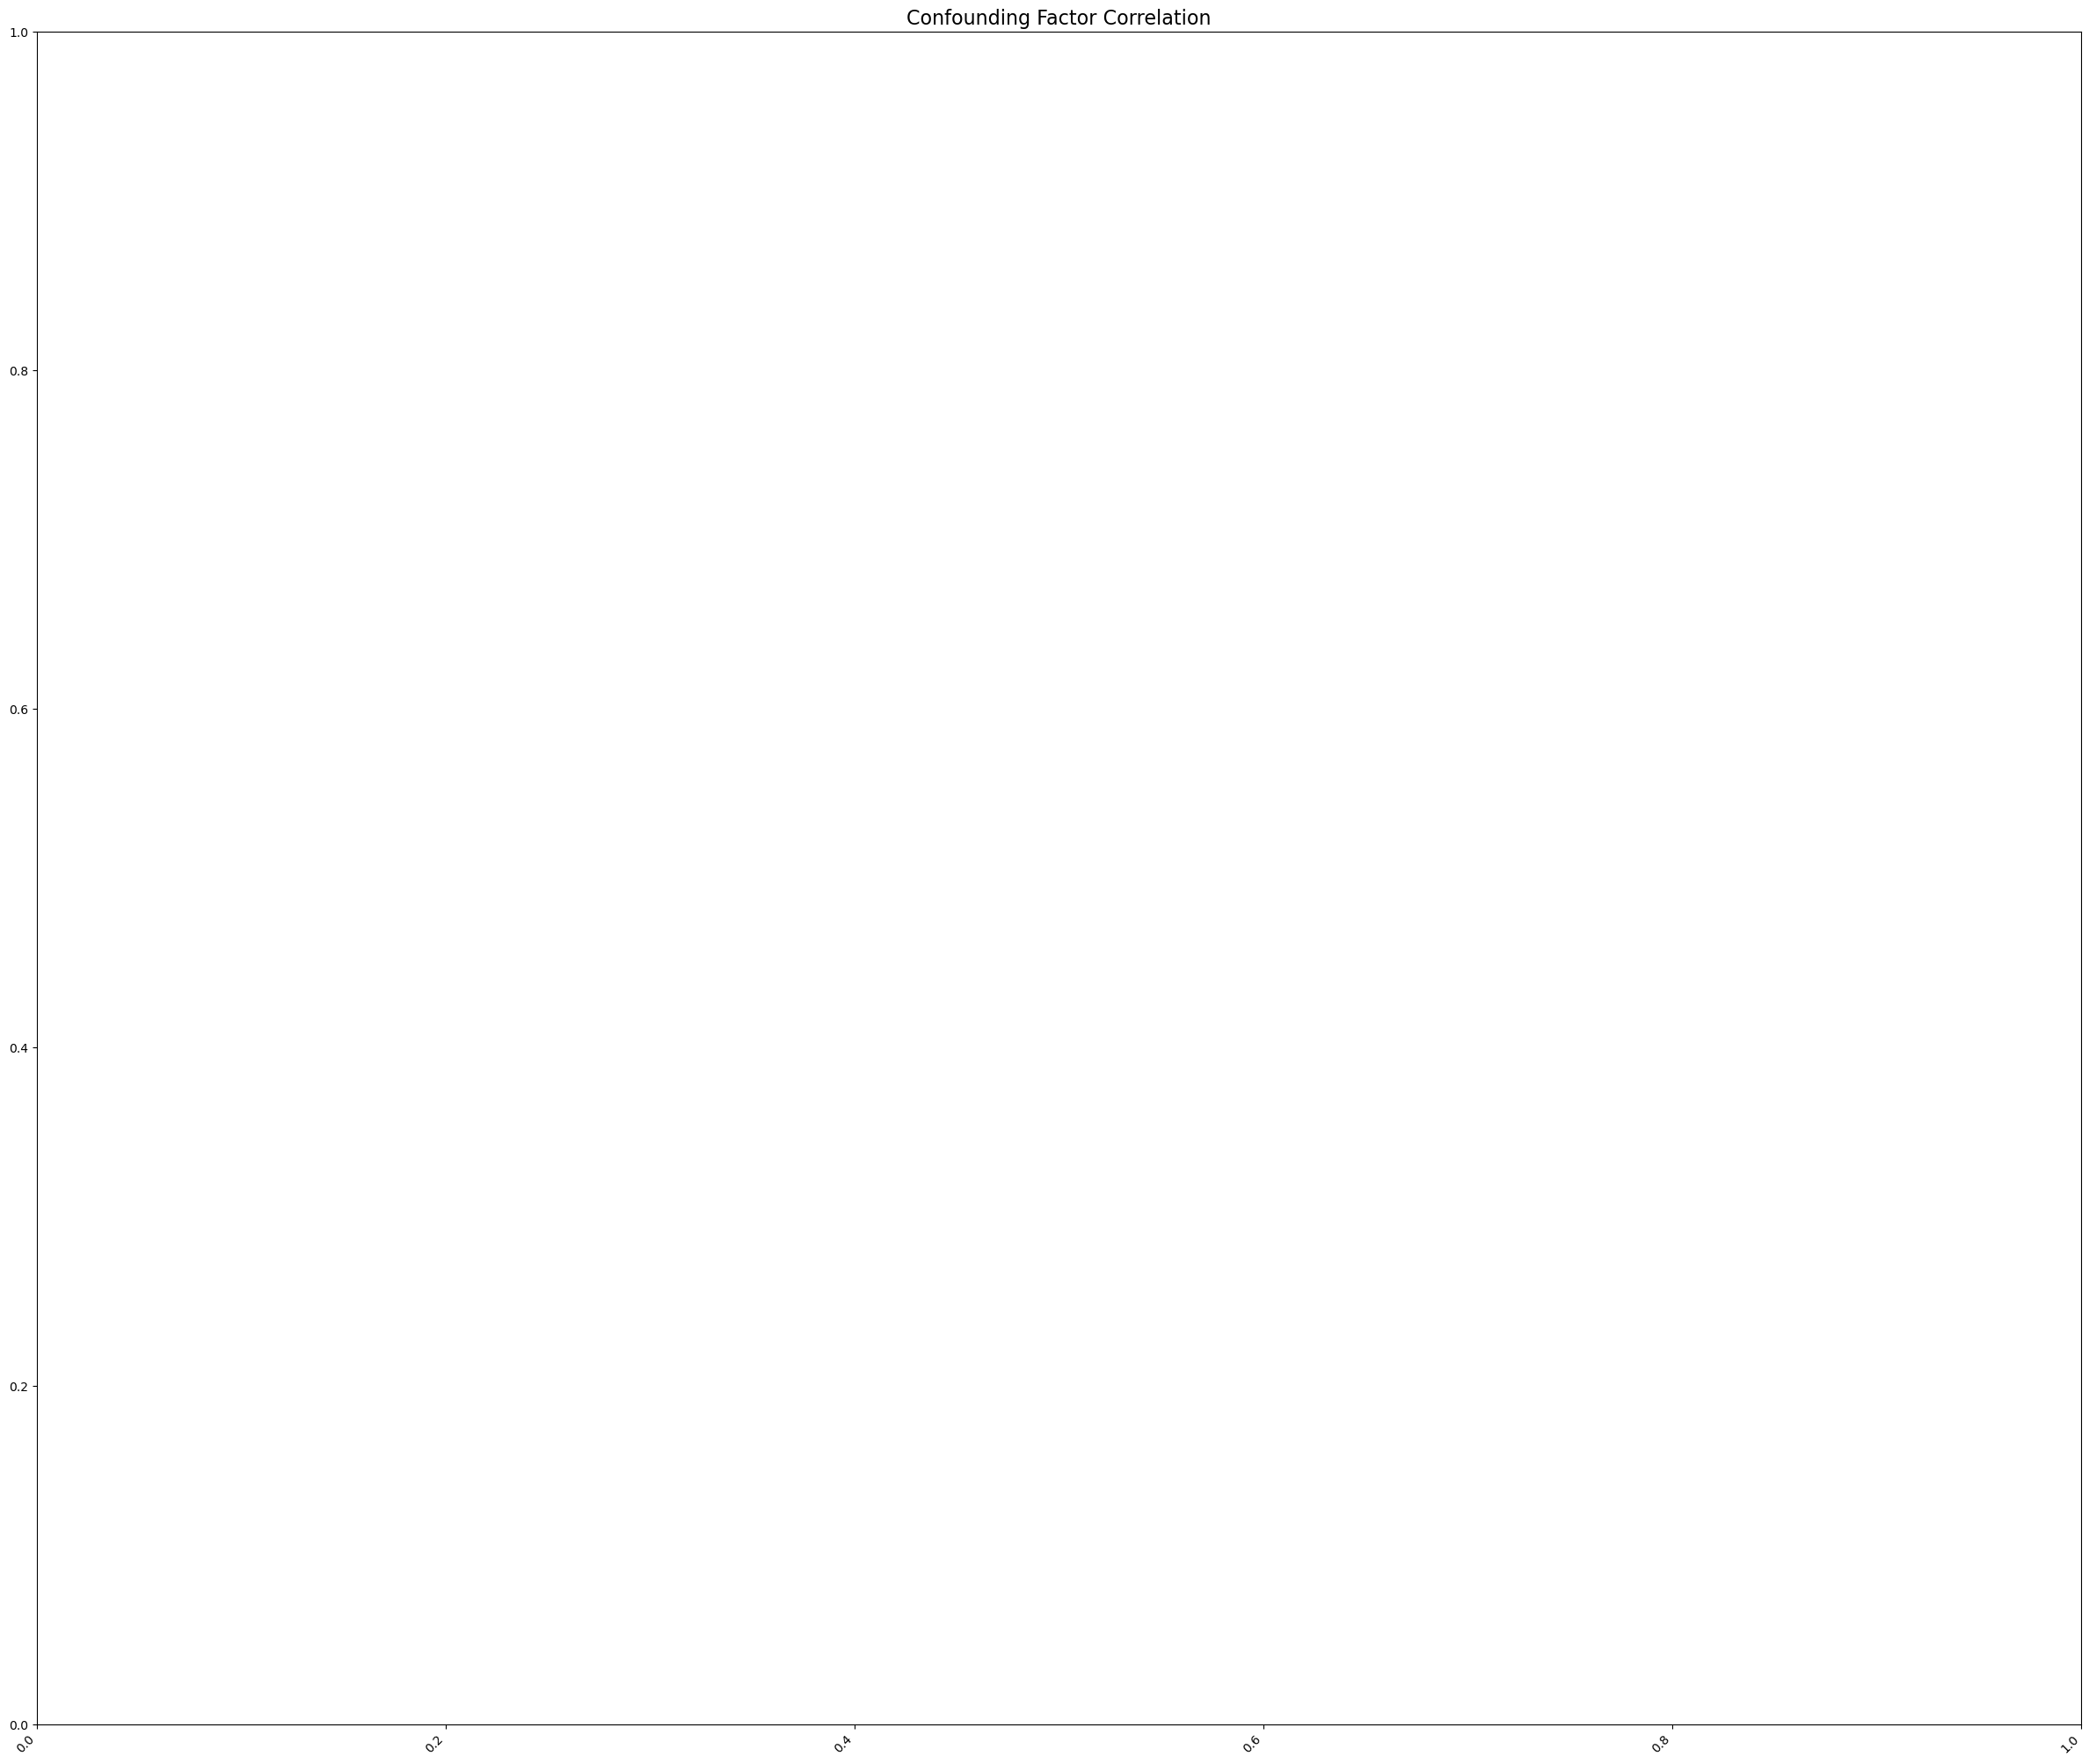

In [24]:
#Confounding factor analysis
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=.5)
plt.figure(figsize=(30,25))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Confounding Factor Correlation', fontsize = 16)
plt.show()

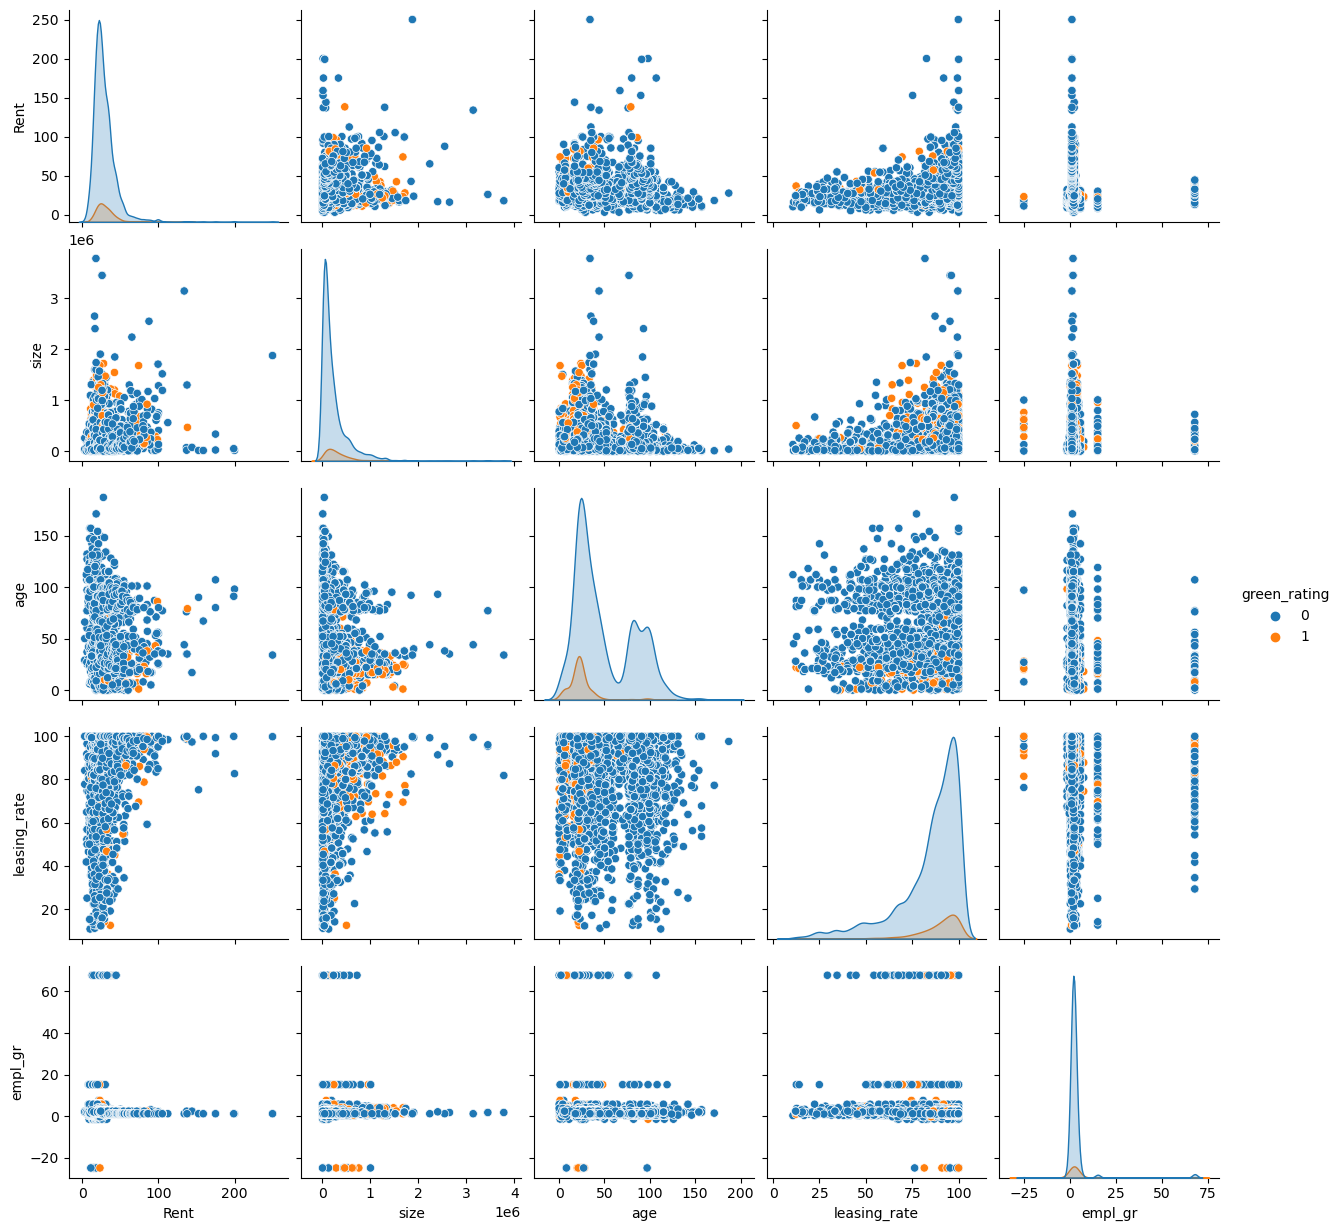

In [28]:
#Create a pairplot
sns.pairplot(df, hue='green_rating', vars = ['Rent', 'size', 'age', 'leasing_rate', 'empl_gr'])
plt.show()

In [30]:
#Cost-Benefit Analysis
avg_building_size = 250000
additional_revenue = avg_building_size * 2.6
premium_cost = 100000000 * 0.05
payback_period = premium_cost / additional_revenue
print(additional_revenue)
print(premium_cost)
print(payback_period)

650000.0
5000000.0
7.6923076923076925


In [ ]:
#Based on the chart analysis, as well as the cost-benefit analysis, I want to conclude that although I do agree that green building
#leads to higher rent, which can be beneficial for the economy, the evidence that green building will leads to more occupancy is 
#still questionable, based on the scatter plot, as it has a wide range. In addition, potential confounding factors such as age and class
#should also be taken into consideration in future analysis.